# **Part 2:Apply predictive analytics**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Customer-Purchase-History.csv")
df.head()

,CustomerID,Product,PurchaseDate,Quantity,UnitPrice,CustomerName,ProductCategory,PaymentMethod,ReviewRating,TotalPrice
0,C5361,Phone,2024-03-05,8,618.83,Customer C5361,Office Supplies,Cash,1,4950.64
1,C6231,Laptop,2025-06-21,7,366.22,Customer C6231,Electronics,Debit Card,3,2563.54
2,C7704,Chair,2023-06-25,5,634.51,Customer C7704,Office Supplies,Credit Card,4,3172.55
3,C2923,Printer,2023-09-30,3,508.63,Customer C2923,Office Supplies,Gift Card,1,1525.89
4,C4847,Monitor,2023-04-03,4,452.06,Customer C4847,Electronics,Credit Card,2,1808.24


**1.Time Series Forecasting:  --  Exponential Smoothing**

In [3]:
# convert "PurchaseDate" to datatime format
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate']) 

In [4]:
# change the column to month and year
df['YearMonth'] = df['PurchaseDate'].dt.to_period('M').astype(str)

In [7]:
#
monthly_data = df.groupby('YearMonth')['TotalPrice'].sum().reset_index() 
monthly_data

,YearMonth,TotalPrice
0,2023-01,98390.67
1,2023-02,109746.60
2,2023-03,91665.47
3,2023-04,85517.05
4,2023-05,117663.53
5,2023-06,119837.23
6,2023-07,119476.63
7,2023-08,116736.14
8,2023-09,85040.67
9,2023-10,87857.58


In [6]:
# Save "TotalPrice" values in a variable 
TotalPrice = monthly_data['TotalPrice'].values 

In [19]:
# the alpha value 
alpha = 0.6

In [20]:
# save the first "TotalPrice" value in variable
forecast = [TotalPrice[0]]

In [21]:
#Apply exponential smoothing formula for all month 
for t in range(1, len(TotalPrice)):
    forecast.append(forecast[-1] + alpha * (TotalPrice[t] - forecast[-1]))

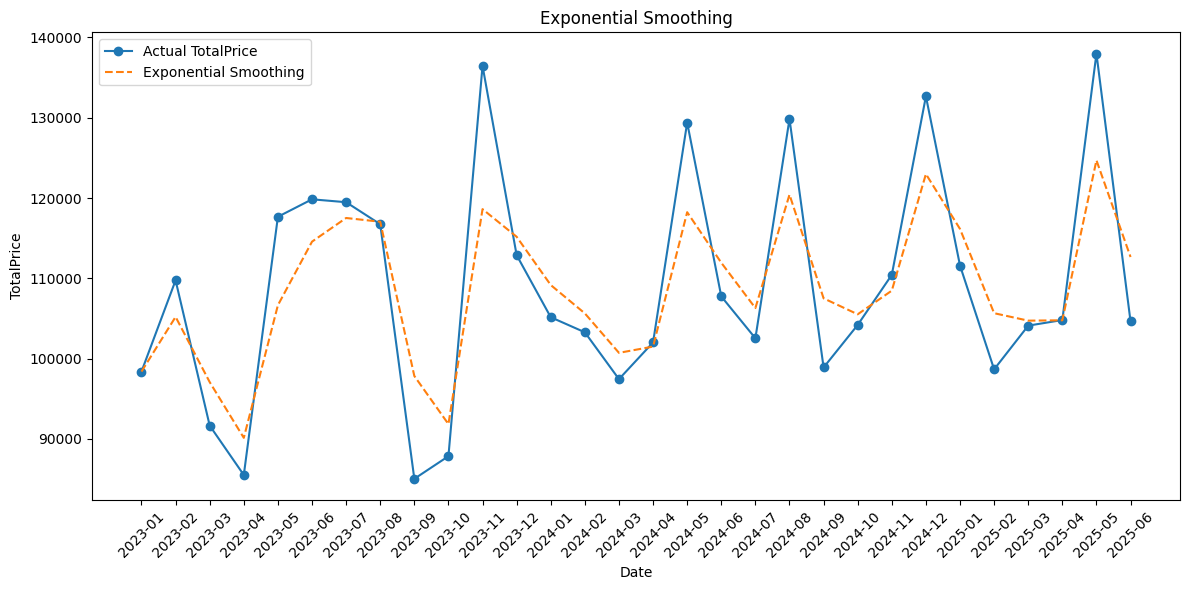

In [22]:
plt.figure(figsize=(12,6))
plt.plot(monthly_data['YearMonth'], TotalPrice, label='Actual TotalPrice', marker='o')
plt.plot(monthly_data['YearMonth'], forecast, label='Exponential Smoothing', linestyle='--')
plt.title('Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('TotalPrice')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()